<a href="https://colab.research.google.com/github/El-charry/Inmuebles_mexico/blob/main/Inmuebles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQOHKteXsrurcAh_bkHB7qC8SApXdVPTJkmA3nlWhLqiGQvvG9kvCx0U_E8SJoLlmqY1vp3fBlL1aIP/pub?gid=1874055160&single=true&output=csv')
df.head()

,Referencia,FechaAlta,Tipo,Operación,Ciudad,Superficie,Precio Venta,Fecha Venta,Vendedor,Estatus,Días para Vender
0,1,18/01/2016,Estacionamiento,Alquiler,Cancun,215,$1.154.980,14/01/2017,Joaquin,Vendida,362
1,2,20/01/2016,Oficina,Alquiler,Tijuana,287,$2.851.058,02/01/2017,Joaquin,Vendida,348
2,3,20/01/2016,Local,Venta,Monterrey,40,$321.68,11/01/2017,Jesus,Vendida,357
3,4,24/01/2016,Industrial,Venta,Cancun,178,$1.142.938,23/01/2017,Joaquin,Vendida,365
4,5,03/02/2016,Departamento,Venta,Monterrey,275,$2.141.700,08/01/2017,Jesus,Vendida,340


In [10]:
df.shape

(2651, 11)

In [11]:
#Información general de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Referencia        2651 non-null   int64 
 1   FechaAlta         2651 non-null   object
 2   Tipo              2651 non-null   object
 3   Operación         2651 non-null   object
 4   Ciudad            2651 non-null   object
 5   Superficie        2651 non-null   int64 
 6   Precio Venta      2651 non-null   object
 7   Fecha Venta       2651 non-null   object
 8   Vendedor          2387 non-null   object
 9   Estatus           2651 non-null   object
 10  Días para Vender  2651 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 227.9+ KB


In [12]:
#Descripcion estadistica de las columnas numericas
df.describe()

,Referencia,Superficie,Días para Vender
count,2651.000000,2651.000000,2651.000000
mean,1326.000000,171.201811,365.289702
std,765.422106,74.937985,200.002488
min,1.000000,40.000000,90.000000
25%,663.500000,106.000000,190.000000
50%,1326.000000,172.000000,323.000000
75%,1988.500000,237.000000,542.000000
max,2651.000000,300.000000,730.000000


In [13]:
#Descripcion de las variables categoricas
df.describe(include=['O'])

,FechaAlta,Tipo,Operación,Ciudad,Precio Venta,Fecha Venta,Vendedor,Estatus
count,2651,2651,2651,2651,2651,2651,2387,2651
unique,827,7,2,4,2633,819,6,2
top,6/10/2016,Departamento,Venta,Monterrey,$567.49,26/11/2018,Carmen,Vendida
freq,16,408,1343,680,2,11,423,2387


**Comprobación de outliers**

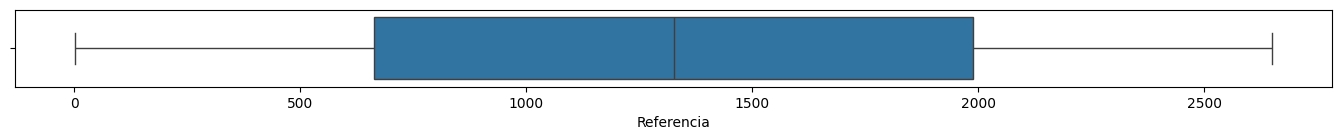

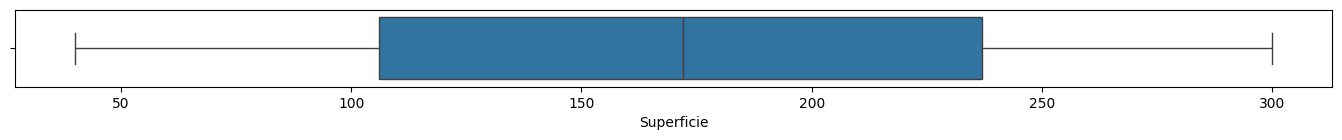

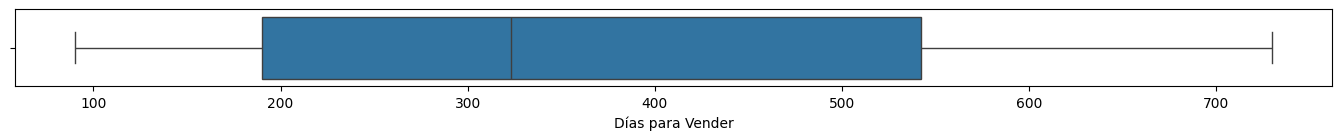

In [14]:
num_cols=df.select_dtypes(include='number').columns

for col in num_cols:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df[num_cols], x=col)

En este caso, el gráfico de caja no muestra valores atípicos (outliers) en el conjunto de datos. Esto indica que todas las observaciones se encuentran dentro del rango esperado según los límites definidos por el método del rango intercuartílico (IQR). La ausencia de outliers demuestra que los datos tienen una distribución uniforme, lo que facilita el análisis y reduce la necesidad de realizar ajustes o transformaciones adicionales.

**Valores nulls**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Referencia        2651 non-null   int64 
 1   FechaAlta         2651 non-null   object
 2   Tipo              2651 non-null   object
 3   Operación         2651 non-null   object
 4   Ciudad            2651 non-null   object
 5   Superficie        2651 non-null   int64 
 6   Precio Venta      2651 non-null   object
 7   Fecha Venta       2651 non-null   object
 8   Vendedor          2387 non-null   object
 9   Estatus           2651 non-null   object
 10  Días para Vender  2651 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 227.9+ KB


En este caso se puede encontrar valores nulls en el campo 'Vendedor' debido a que no sea concretado la accion, ya sea venta o arquiler. Los espacios vacios representa 9,96% de campos vacios. Para corregir esta falta de datos se remplazara los valores faltantes con "En proceso"

In [16]:
df['Vendedor'] = df['Vendedor'].fillna("En proceso")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Referencia        2651 non-null   int64 
 1   FechaAlta         2651 non-null   object
 2   Tipo              2651 non-null   object
 3   Operación         2651 non-null   object
 4   Ciudad            2651 non-null   object
 5   Superficie        2651 non-null   int64 
 6   Precio Venta      2651 non-null   object
 7   Fecha Venta       2651 non-null   object
 8   Vendedor          2651 non-null   object
 9   Estatus           2651 non-null   object
 10  Días para Vender  2651 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 227.9+ KB


In [18]:
valor_minimo = df['Precio Venta'].min()
valor_maximo = df['Precio Venta'].max()
print("Valor mínimo:", valor_minimo)
print("Valor máximo:", valor_maximo)

Valor mínimo: $1.001.376
Valor máximo: $999.95


In [19]:
df['Precio Venta'] = df['Precio Venta'].str.replace('$', '', regex=False).str.replace('.', '', regex=False)
df['Precio Venta'] = pd.to_numeric(df['Precio Venta'])

# Calcular promedio, mediana y moda
promedio = df['Precio Venta'].mean()
print("Promedio:", promedio)

mediana = df['Precio Venta'].median()
print("Mediana:", mediana)

moda = df['Precio Venta'].mode()
print("Moda:", moda)

Promedio: 968689.7691437193
Mediana: 1140876.0
Moda: 0       35867
1       41643
2       41926
3       44694
4       54490
5       56376
6       56749
7       57420
8       79722
9       82706
10      88278
11      88622
12      91325
13      91738
14    1191044
15    1199394
16    1342278
17    2682225
Name: Precio Venta, dtype: int64


<ipython-input-20-fbbdee7717ec>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])


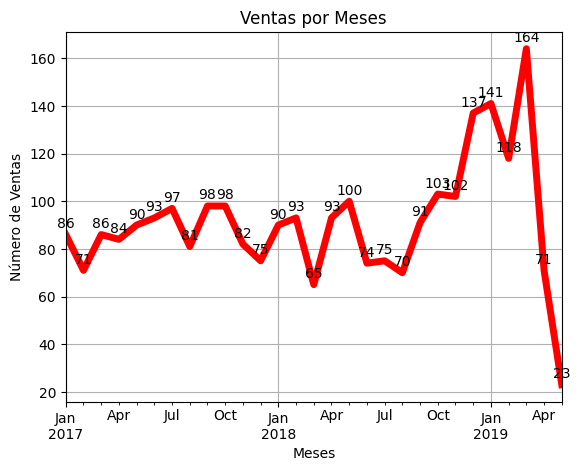

In [20]:
#Convierte los datos de fecha en valores
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])

#Grafico de lineas para mostrar las vendas en cada mes
# Crear el gráfico de línea
ax = df.groupby(df['Fecha Venta'].dt.to_period('M')).size().plot(kind='line')

# Obtener los datos de X y Y del gráfico
x_values = ax.get_lines()[0].get_xdata()
y_values = ax.get_lines()[0].get_ydata()

# Agregar etiquetas de datos
for x, y in zip(x_values, y_values):
    plt.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')
#Color y grosor de la linea
ax = df.groupby(df['Fecha Venta'].dt.to_period('M')).size().plot(kind='line', color='red',linewidth=5)


# Personalizar el gráfico
plt.title('Ventas por Meses')
plt.xlabel('Meses')
plt.ylabel('Número de Ventas')
plt.grid(True)
plt.show()

**Grafico de linea**

En el siguiente grafico de lineas se observa una variabilidad significativa en las ventas mensuales, posiblemente influenciada por factores económicos, estacionales o dinámicas del mercado. Es destacable una tendencia de crecimiento registrada hacia finales de 2018 y principios de 2019, seguida de una fuerte caída posterior. Esto sugiere la necesidad de un análisis más detallado para identificar las posibles causas y comprender mejor el comportamiento del mercado.

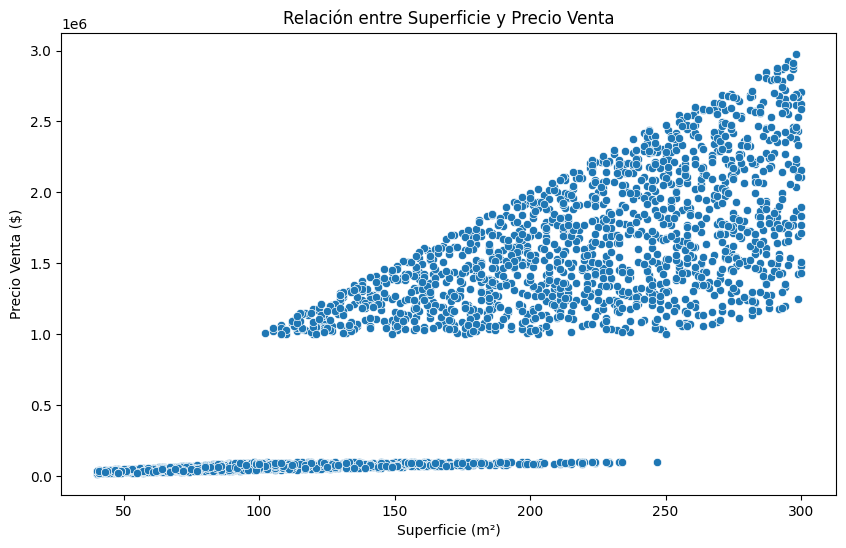

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Superficie', y='Precio Venta')
plt.title('Relación entre Superficie y Precio Venta')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio Venta ($)')
plt.show()


**Grafico de dispersión**

El análisis realizado muestra una relación positiva evidente entre la superficie de las propiedades y su precio de venta, lo que indica que el tamaño juega un papel clave en la valoración de los inmuebles. No obstante, es fundamental considerar que aspectos como la ubicación, las características específicas de cada propiedad y las dinámicas del mercado también tienen un impacto significativo en el precio final. En términos generales, los hallazgos respaldan la hipótesis de que las propiedades más grandes tienden a tener un mayor valor en el mercado.

<Axes: title={'center': 'Estatus'}, ylabel='count'>

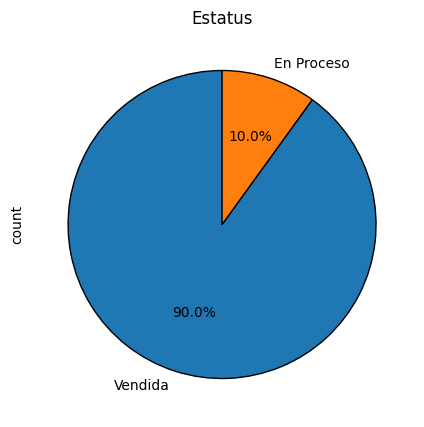

In [22]:
df['Estatus'].value_counts().plot(kind='pie',
                                  title='Estatus',
                                  autopct='%1.1f%%',  # Muestra el porcentaje con 1 decimal
                                  startangle=90,  # Para que el gráfico comience desde arriba
                                  figsize=(5, 5),  # Tamaño del gráfico
                                  wedgeprops={'edgecolor': 'black'})  # Bordes de los sectores


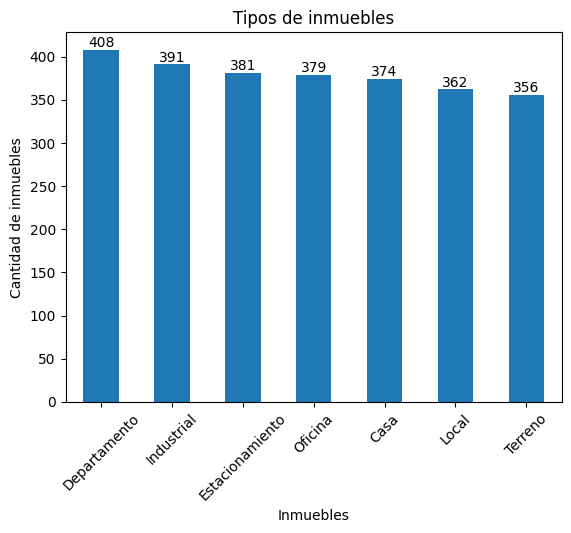

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar la frecuencia de cada tipo de inmueble
conteo_tipos = df['Tipo'].value_counts()

# Crear el gráfico de barras
conteo_tipos.plot(kind='bar', title='Tipos de inmuebles')

# Agregar etiquetas a las barras
for i in range(len(conteo_tipos)):
    plt.text(i, conteo_tipos.iloc[i], str(conteo_tipos.iloc[i]), ha='center', va='bottom')

# Etiquetas de los ejes
plt.xlabel('Inmuebles')
plt.ylabel('Cantidad de inmuebles')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

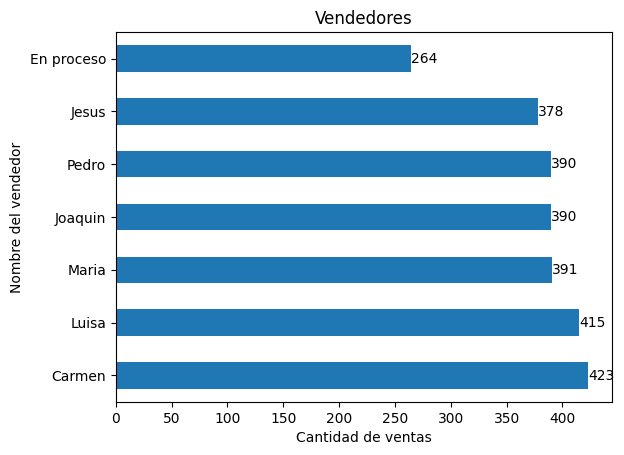

In [24]:
#Grafico de Barras horizontales de vendedores

import matplotlib.pyplot as plt


# Contar la frecuencia de cada tipo de inmueble
conteo_tipos = df['Vendedor'].value_counts()

# Crear el gráfico de barras horizontales
conteo_tipos.plot(kind='barh', title='Vendedores')

# Agregar etiquetas a las barras (ahora en el eje horizontal)
for i, v in enumerate(conteo_tipos):
    plt.text(v, i, str(v), va='center')

# Etiquetas de los ejes
plt.xlabel('Cantidad de ventas')
plt.ylabel('Nombre del vendedor')



# Mostrar el gráfico
plt.show()

**Grafico de barras horizonrales**

Carmen y Luisa se destacan como las vendedoras más exitosas. Joaquín, Pedro y María tienen un rendimiento intermedio. Por otro lado, Jesús es el vendedor con menos ventas.

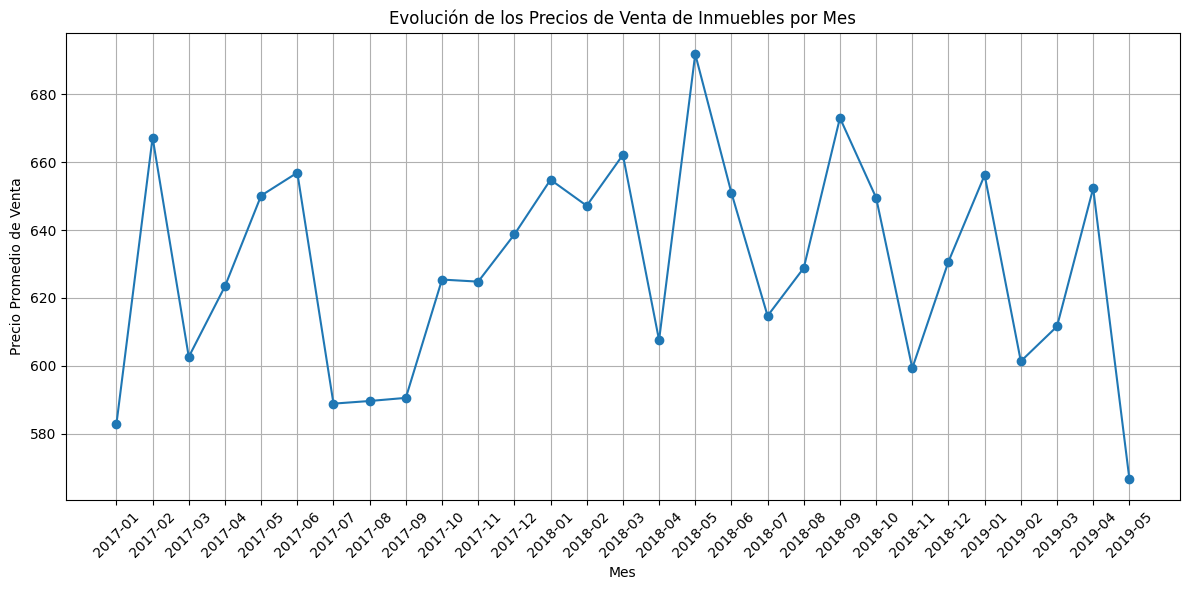

In [ ]:
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])
df['Mes'] = df['Fecha Venta'].dt.to_period('M')  # Agrupar por mes
precios_promedio_mensuales = df.groupby('Mes')['Precio Venta'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(precios_promedio_mensuales['Mes'].astype(str), precios_promedio_mensuales['Precio Venta'], marker='o')
plt.title('Evolución de los Precios de Venta de Inmuebles por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio de Venta')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.grid()
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()

**Grafico de lineas**

La representacion del grafico de lineas permite evidenciar cual es el promedio  de las ventas con respecto al tiempo. Por lo tanto, se observa que los picos más altos del precio promedio de venta de inmuebles ocurrieron en mayo de 2018 y septiembre de 2018, seguidos de caídas significativas en los meses posteriores. Esto podría indicar que estos meses corresponden a temporadas de alta demanda o ajustes en el mercado inmobiliario, mientras que las caídas reflejan periodos de menor actividad o ajustes en la oferta. Este patrón sugiere una posible estacionalidad en los precios promedio, que podría aprovecharse para planificar estrategias de compra o venta en el sector.